# Linear Regression
This notebook contains examples and code explainig how to use linear regression for supervised learning.
The code is based on several examples from the internet - credits at the end of the notebook.

## 1. Introduction to least square method

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

### Dataset is: [Price, Demand]

In [2]:
#Dataset = (x1, y1 ), (x2, y2 ), ..., (x5, y5)
# y is dependent and x is the independent variables.
input = np.array([[37, 46],
                  [57, 26],
                  [77, 67],
                  [87, 14],
                  [107, 10]])

### Setup the matrices

In [3]:
# n = number of observations. 
# Amount of Y's.
n = np.shape(input)[0]

In [4]:
print(n)

5


In [5]:
# Create a matrix
# To transpose a matrix you write an .T at the end of the matrix
# X = (1, x1), (1, x2), ..., (1, x5)
X = np.matrix([np.ones(n), input[:,0]]).T

In [6]:
print (X)

[[  1.  37.]
 [  1.  57.]
 [  1.  77.]
 [  1.  87.]
 [  1. 107.]]


In [7]:
# Input all the values from coloumn two
# Transpose it by writing a T at the end
# Y = y1, y2, ..., y5
Y = np.matrix(input[:,1]).T

In [8]:
print(Y)

[[46]
 [26]
 [67]
 [14]
 [10]]


### Solve for projection matrix

In [9]:
# dot is an operation in order to multiply two matrices. You call that matrix on the actuall matrix.
# .T transpose the matrix
# inalg.inv invert the matrix

# A = (X^T * X)^-1 * X^T * Y
A = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)

In [10]:
print(A)

[[64.3       ]
 [-0.43424658]]


In [11]:
# Get the value of A at position (0,0).
# b is the constant or intercept
b = A[0,0]

In [12]:
print(b)

64.29999999999995


In [13]:
# Get the value of A at position (1,0).
# m is the coefficient
m = A[1,0]

In [14]:
print (m)

-0.4342465753424659


In [15]:
# Make an array of some numbers between 0 and 125 in steps of 6
# xx gives  the range of the X value
xx = np.linspace(0.0, 125, num=6, retstep=False)
print(xx)


[  0.  25.  50.  75. 100. 125.]


In [16]:
# Every element will be multiplied by A[1] and added by A[1]
# array creates a new array
# yy gives the range of the Y values
yy = np.array(A[0] + A[1] * xx)
print(yy)

[[64.3        53.44383562 42.58767123 31.73150685 20.87534247 10.01917808]]


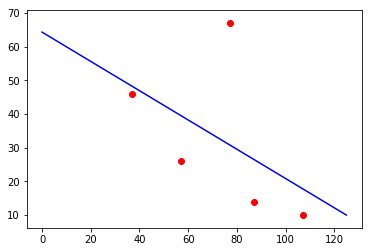

In [17]:
# Plot data, regression line
plt.figure(1)


# drawing the blue line in the coordinate system. 
# Assign the xx to X
# Assign the yy to Y
# then assign a blue color
plt.plot(xx, yy.T, color='b')

# Add the dots in the coordinate system. 
# Assign input at coloumn 0 to x
# assign input at coloumn 1 to y
# then assign a red color.
plt.scatter(input[:,0], input[:,1], color='r')

# if the dots are close to the line, the model is good. The error is distancly to each of the dots and the line
plt.show()


In [18]:
print(input[:,0])
print(input[:,1])

[ 37  57  77  87 107]
[46 26 67 14 10]


## 2. Introduction to Simple Linear Regression

In [19]:
# Code source: Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

In [20]:
boston = datasets.load_boston()
print(boston)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [21]:
# Use only one feature
# np.newaxis increase the dimension of existing array by one dimension, 2D becomes 3D.
boston_X = boston.data[:, np.newaxis, 1]
print(boston_X)

[[ 18. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [ 12.5]
 [ 12.5]
 [ 12.5]
 [ 12.5]
 [ 12.5]
 [ 12.5]
 [ 12.5]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [ 75. ]
 [ 75. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [ 21. ]
 [ 21. ]
 [ 21. ]
 [ 21. ]
 [ 75. ]
 [ 90. ]
 [ 85. ]
 [100. ]
 [ 25. ]
 [ 25. ]
 [ 25. ]
 [ 25. ]
 [ 25. ]
 [ 25. ]
 [ 17.5]
 [ 80. ]
 [ 80. ]
 [ 12.5]
 [ 12.5]
 [ 12.5]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [ 25. ]
 [ 25. ]
 [ 25. ]
 [ 25. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [ 28. ]
 [ 28. ]
 [ 28. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 

In [22]:
step = 10

# prepare the training data
boston_X_train = boston_X[:step]

# prepare the test data
boston_X_test = boston_X[step:]

In [23]:
print("train set: \n", boston_X_train)


print("train test: \n", boston_X_test)

train set: 
 [[18. ]
 [ 0. ]
 [ 0. ]
 [ 0. ]
 [ 0. ]
 [ 0. ]
 [12.5]
 [12.5]
 [12.5]
 [12.5]]
train test: 
 [[ 12.5]
 [ 12.5]
 [ 12.5]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [ 75. ]
 [ 75. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [ 21. ]
 [ 21. ]
 [ 21. ]
 [ 21. ]
 [ 75. ]
 [ 90. ]
 [ 85. ]
 [100. ]
 [ 25. ]
 [ 25. ]
 [ 25. ]
 [ 25. ]
 [ 25. ]
 [ 25. ]
 [ 17.5]
 [ 80. ]
 [ 80. ]
 [ 12.5]
 [ 12.5]
 [ 12.5]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [ 25. ]
 [ 25. ]
 [ 25. ]
 [ 25. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [ 28. ]
 [ 28. ]
 [ 28. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 [  0. ]
 

In [24]:
# Target: The progression of the matrix
# prepare the training data of target
boston_y_train = boston.target[:step]

# prepare the test data of target
boston_y_test = boston.target[step:]

In [25]:
print("target: ", boston_y_train)

print("test: ", boston_y_test)

target:  [24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9]
test:  [15.  18.9 21.7 20.4 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5
 15.6 13.9 16.6 14.8 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.
 24.7 30.8 34.9 26.6 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5
 25.  23.4 18.9 35.4 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5
 19.4 22.  17.4 20.9 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3
 28.  23.9 24.8 22.9 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.
 20.6 28.4 21.4 38.7 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4
 19.8 19.4 21.7 22.8 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3
 20.5 17.3 18.8 21.4 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1
 17.4 17.1 13.3 17.8 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4
 21.5 19.6 15.3 19.4 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.
 22.7 25.  50.  23.8 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6
 29.9 37.2 39.8 36.2 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5
 36.4 31.1 2

In [26]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(boston_X_train, boston_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
# The larger the error, the worse the model. 
print("Mean squared error: %.2f"
      % np.mean((regr.predict(boston_X_test) - boston_y_test) ** 2))

# Explained variance score: 1 is perfect prediction
# The less the explained variance score the less the model will explain.
print('Variance score: %.2f' % regr.score(boston_X_test, boston_y_test))

Coefficients: 
 [-0.60768598]
Mean squared error: 387.05
Variance score: -3.55


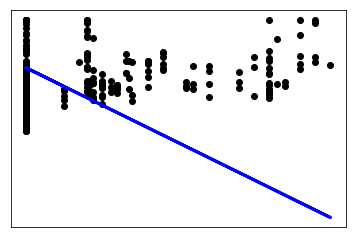

In [28]:
# Plot outputs
# scatter plots the blue line
# blue line is our model of 
plt.scatter(boston_X_test, boston_y_test,  color='black')

# plot plots the dots
plt.plot(boston_X_test, regr.predict(boston_X_test), color='blue',
         linewidth=3)


plt.xticks(())
plt.yticks(())


# the dots are spread due to the low explained variance score
plt.show()

## 3. Introduction to Multiple Linear Regression

In [29]:
#from pandas.core import datetools
import statsmodels.api as sm

In [30]:
from sklearn import datasets ## imports datasets from scikit-learn
winedata = datasets.load_wine() ## loads Wine dataset from datasets library 

### Example data from sklearn

In [31]:
print(winedata.DESCR)

Wine Data Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- 1) Alcohol
 		- 2) Malic acid
 		- 3) Ash
		- 4) Alcalinity of ash  
 		- 5) Magnesium
		- 6) Total phenols
 		- 7) Flavanoids
 		- 8) Nonflavanoid phenols
 		- 9) Proanthocyanins
		- 10)Color intensity
 		- 11)Hue
 		- 12)OD280/OD315 of diluted wines
 		- 13)Proline
        	- class:
                - class_0
                - class_1
                - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash: 

### These are the independent variables

In [32]:
# The independent variable
winedata.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

### These are the dependent variables

In [33]:
# The dependent variable
winedata.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

### Define the data to fit a model

In [34]:
import numpy as np
import pandas as pd

# define the data/predictors as the pre-set feature names  
df = pd.DataFrame(winedata.data, columns=winedata.feature_names)
print(df)

     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
5      14.20        1.76  2.45               15.2      112.0           3.27   
6      14.39        1.87  2.45               14.6       96.0           2.50   
7      14.06        2.15  2.61               17.6      121.0           2.60   
8      14.83        1.64  2.17               14.0       97.0           2.80   
9      13.86        1.35  2.27               16.0       98.0           2.98   
10     14.10        2.16  2.30               18.0      105.0           2.95   
11     14.12        1.48  2.32               16.8   

In [35]:
# Put the target (wine value -- MEDV) in another DataFrame
target = pd.DataFrame(winedata.target, columns=['MEDV'])
print(target)

     MEDV
0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
..    ...
148     2
149     2
150     2
151     2
152     2
153     2
154     2
155     2
156     2
157     2
158     2
159     2
160     2
161     2
162     2
163     2
164     2
165     2
166     2
167     2
168     2
169     2
170     2
171     2
172     2
173     2
174     2
175     2
176     2
177     2

[178 rows x 1 columns]


### Use statsmodels and run a regression without constant

In [36]:
import statsmodels.api as sm

X = df['alcohol'] ## X usually means our input variables (or independent variables)
y = target["MEDV"] ## Y usually means our output/dependent variable

model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

In [37]:
print(X)

#print(Y)

0      14.23
1      13.20
2      13.16
3      14.37
4      13.24
5      14.20
6      14.39
7      14.06
8      14.83
9      13.86
10     14.10
11     14.12
12     13.75
13     14.75
14     14.38
15     13.63
16     14.30
17     13.83
18     14.19
19     13.64
20     14.06
21     12.93
22     13.71
23     12.85
24     13.50
25     13.05
26     13.39
27     13.30
28     13.87
29     14.02
       ...  
148    13.32
149    13.08
150    13.50
151    12.79
152    13.11
153    13.23
154    12.58
155    13.17
156    13.84
157    12.45
158    14.34
159    13.48
160    12.36
161    13.69
162    12.85
163    12.96
164    13.78
165    13.73
166    13.45
167    12.82
168    13.58
169    13.40
170    12.20
171    12.77
172    14.16
173    13.71
174    13.40
175    13.27
176    13.17
177    14.13
Name: alcohol, Length: 178, dtype: float64


### Interpretation

**Coefficient (coef):** Means that as the RM variable increases by 1, the predicted value of MDEV increases by 3.634

**R-squared:** Is the percentage of *variance* our model explains (also called coefficient of determination).
- Best possible score is 1.0 and it can be negative (because the model can be worse than random!). 
- A constant model that always predicts the expected value of y, disregarding the input features, would get a R-squared score of 0.0.

**The standard error:** standard deviation of the sampling distribution of a statistic, most commonly of the mean.

**The t scores and p-values:** Useful for hypothesis testing. It means that RM has statistically significant p-value; we predict at a 95% percent confidence that the value of RM is between 3.548 to 3.759.

In [38]:
# Print out the statistics of the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     238.1
Date:                Wed, 11 Jul 2018   Prob (F-statistic):           1.36e-34
Time:                        22:37:12   Log-Likelihood:                -211.45
No. Observations:                 178   AIC:                             424.9
Df Residuals:                     177   BIC:                             428.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
alcohol        0.0707      0.005     15.431      0.000       0.062       0.080
==============================================================================
Omnibus:                      214.051   Durbin-Watson:                   0.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.578
Skew:                          -0.017   Prob(JB):                      0.00113
Kurtosis:                       1.647   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Use statsmodels and run a regression with constant

In [39]:
import statsmodels.api as sm # import statsmodels 

X = df['alcohol'] 
y = target["MEDV"] 
X = sm.add_constant(X) ## Add an intercept or constant to the model

model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     21.25
Date:                Wed, 11 Jul 2018   Prob (F-statistic):           7.72e-06
Time:                        22:37:12   Log-Likelihood:                -196.56
No. Observations:                 178   AIC:                             397.1
Df Residuals:                     176   BIC:                             403.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0119      0.885      5.660      0.000       3.264       6.759
alcohol       -0.3133      0.068     -4.610      0.000      -0.447      -0.179
==============================================================================
Omnibus:                       40.763   Durbin-Watson:                   0.101
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.233
Skew:                           0.659   Prob(JB):                     4.04e-05
Kurtosis:                       2.004   Cond. No.                         211.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Performing a Multiple Linear Regression

In [40]:
X = df[['alcohol','malic_acid']]
y = target['MEDV'] 
X = sm.add_constant(X) ## Add an intercept or constant to the model

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

### Observations
- This model has a much higher R-squared value *0.948*, meaning that this model explains 94.8% of the variance in our dependent variable. (Most of the time, when we add variables to a regression model, R² will be higher..)
- RM and LSTAT are statistically significant in predicting (or estimating) the median house value 
- As RM increases by 1, MEDV will increase by 5.0948 and when LSTAT increases by 1, MEDV will decrease by -0.6424. 
- LSTAT: is the percentage of lower status of the populatio
- RM: more rooms in a house (usually the higher, the value of the house will become higher).

In [41]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     42.99
Date:                Wed, 11 Jul 2018   Prob (F-statistic):           6.51e-16
Time:                        22:37:12   Log-Likelihood:                -171.14
No. Observations:                 178   AIC:                             348.3
Df Residuals:                     175   BIC:                             357.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7994      0.770      6.231      0.000       3.279       6.320
alcohol       -0.3560      0.059     -5.997      0.000      -0.473      -0.239
malic_acid     0.3281      0.043      7.607      0.000       0.243       0.413
==============================================================================
Omnibus:                        5.127   Durbin-Watson:                   0.573
Prob(Omnibus):                  0.077   Jarque-Bera (JB):                4.787
Skew:                           0.341   Prob(JB):                       0.0913
Kurtosis:                       2.574   Cond. No.                         214.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Performing Linear Regression with SKLearn

In [42]:
from sklearn import datasets
data = datasets.load_wine()

In [43]:
# define the data/predictors as the pre-set feature names  
df = pd.DataFrame(data.data, columns=data.feature_names)

# Put the target (housing value -- MEDV) in another DataFrame
target = pd.DataFrame(data.target, columns=["MEDV"])

In [44]:
X = df[['alcohol','malic_acid']]
y = target['MEDV']

In [45]:
lm = linear_model.LinearRegression()
model = lm.fit(X,y)

In [46]:
predictions = lm.predict(X)
print(predictions[0:5])

[0.295053   0.68467237 0.88922774 0.32396874 0.93622041]


In [47]:
# This is thre R-squared of the model
lm.score(X,y)

0.3294405905959348

In [48]:
# This is the intercept (constant)
lm.intercept_

4.7994146319956235

In [49]:
# These are the coefficients
lm.coef_

array([-0.355971  ,  0.32813196])